# Analyzing The Picture of Dorian Gray

Lets use a *Jupyter Notebook* to understand a popular novel.

![yy](https://d28hgpri8am2if.cloudfront.net/book_images/onix/cvr9781499806250/pride-and-prejudice-9781499806250_lg.jpg "xx")

We start with some initialization code.

In [19]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
from urllib.request import urlopen 
import re

def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

def read_file(name):
    return re.sub('\\s+', ' ', open(name, "r").read())

We load a plain text file from the current directory.

In [20]:
book = read_url("http://www.gutenberg.org/cache/epub/174/pg174.txt")
# book = read_file("pride_and_prejudice_and_zombies.txt")
chapters = book.split('CHAPTER ')[1:]
#book

And we create a table from it.  The table contains counts of the character names per chapter.

In [21]:
table = Table().with_columns([
    "Dorian",   np.char.count(chapters, "Dorian"),
    "Painting",  np.char.count(chapters, "painting") + np.char.count(chapters, "picture"),
    "Lydia",  np.char.count(chapters, "Lydia"),
    "Catherine",  np.char.count(chapters, "Catherine"),
    "Darcy", np.char.count(chapters, "Darcy"),
    "Georgiana", np.char.count(chapters, "Georgiana")
])
table

Dorian,Painting,Lydia,Catherine,Darcy,Georgiana
22,10,0,0,0,0
45,18,0,0,0,0
9,0,0,0,0,0
25,5,0,0,0,0
1,1,0,0,0,0
27,1,0,0,0,0
25,8,0,0,0,0
30,8,0,0,0,0
30,13,0,0,0,0
14,9,0,0,0,0


## Data Visualization

Visualization helps us quickly summarize and understand the data.

In this example, who are the main characters?  Who are minor characters?

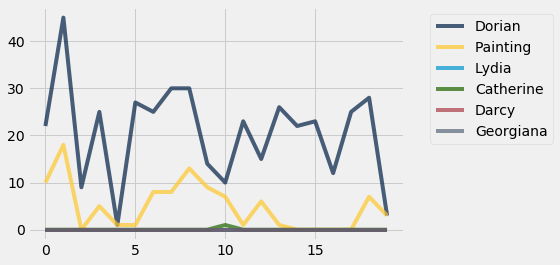

In [22]:
table.plot(overlay=True)

Can we establish a trend over time?

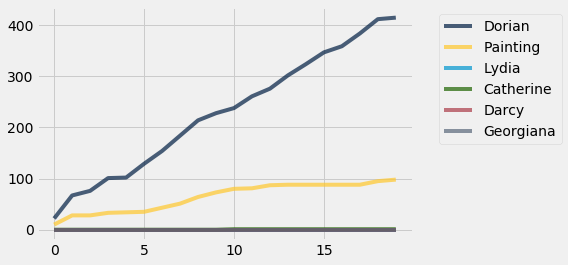

In [23]:
table.cumsum().plot(overlay=True)

Each chapter is a different length in terms of words or characters.  How is this related to the number of period in a chapter?  What does this mean?

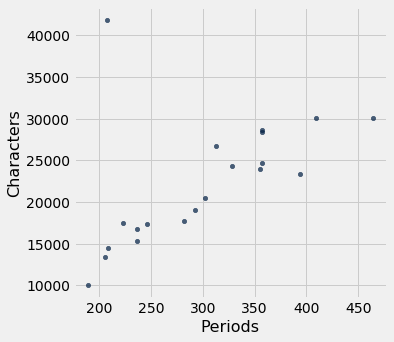

In [24]:
Table().with_columns([
        "Characters", [len(c) for c in chapters],
        "Periods", np.char.count(chapters, "."),
    ]).scatter('Periods')